# REGRESIÓN SIMPLE

In [74]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression

## Paso 0: Datos.

In [75]:
datos = "datos_regresion.csv"
db = pd.read_csv(datos) #we're in

#datos = "test_ejemplo.csv"
#db = pd.read_csv(datos) #we're in

db.head() #vista previa de los datos

CONSUMO  PRECIO  INGRESO
0    197.7     6.8   284752
1    115.3    10.8   167713
2     62.4    20.4    89323
3    155.7     8.1   236223
4     96.0    11.8   147043

In [76]:
def ln(x): #aplicación de ln a todas las columnas
    return math.log(x)
db['INGRESO_ln'] = db['INGRESO'].apply(ln)
db['CONSUMO_ln'] = db['CONSUMO'].apply(ln)
db['PRECIO_ln'] = db['PRECIO'].apply(ln)

db.head() #vista actualizada de la database

CONSUMO  PRECIO  INGRESO  INGRESO_ln  CONSUMO_ln  PRECIO_ln
0    197.7     6.8   284752   12.559374    5.286751   1.916923
1    115.3    10.8   167713   12.030009    4.747537   2.379546
2     62.4    20.4    89323   11.400014    4.133565   3.015535
3    155.7     8.1   236223   12.372532    5.047931   2.091864
4     96.0    11.8   147043   11.898480    4.564348   2.468100

In [77]:
#nombrando cada columna de la base de datos
X = db.loc[:,['INGRESO']].values
y_consumo = db.loc[:,['CONSUMO']].values
y_precio = db.loc[:,['PRECIO']].values
X_log = db.loc[:,['INGRESO_ln']].values
y_consumo_log = db.loc[:,['CONSUMO_ln']].values
y_precio_log = db.loc[:,['PRECIO_ln']].values
#print(X)
#print(y_consumo)
#print(y_precio)

#unidades dadas en miles de pesos
unidad = 1000 #miles
nombre_unidad = 'COP' #de pesos

## Paso 1: Estadística descriptiva univariada (CV).

In [79]:
#mean_x = media de x
#mean_y = media de y
#std_x = desviación std. de x
#std_y = desviación std. de y
#cv_x = coef. variación x
#cv_y = coef. variación y
#SCx = suma de cuadrados de x
#SCy = suma de cuadrados de y
#SCxy = suma de los productos cruzados x, y

#mean_x, mean_y = np.mean(x), np.mean(y)
#std_x, std_y = np.std(x, ddof=1), np.std(y, ddof=1)
#
####---CÁLCULO DE COEFICIENTES DE VARIACIÓN (cv_x) (cv_y)---###
#cv_x, cv_y = (np.std(x, ddof=1) / mean_x) * 100, (np.std(y, ddof=1) / mean_y) * 100
####---INTERPRETACIÓN (cv_x)---###
#print('Coeficiente de variación: {} (x) = {:.2f}%'.format(eje_x, cv_x))
#if cv_x <= 30:
#    print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(eje_x.lower()))
#elif cv_x > 30 and cv_x < 50:
#    print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(eje_x.lower()))
#elif cv_x > 50:
#    print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(eje_x.lower()))
####---INTERPRETACIÓN (cv_y)---###
#print('\nCoeficiente de variación: {} (y) = {:.2f}%'.format(eje_y, cv_y))
#if cv_y <= 30:
#    print('Los valores de la variable {} son homogéneos;\nMUESTRA REPRESENTATIVA.'.format(eje_y.lower()))
#elif cv_y > 30 and cv_y < 50:
#    print('Los valores de la variable {} son un poco heterogéneos;\nMUESTRA POCO REPRESENTATIVA.'.format(eje_y.lower()))
#elif cv_y > 50:
#    print('Los valores de la variable {} son muy heterógeneos;\nMUESTRA NO REPRESENTATIVA.'.format(eje_y.lower()))

REGRESIÓN EXPONENCIAL: ingreso / precio.

R^2 = 0.81

A = 3.70

B = -0.00001
Por un incremento de 1000.00 COP en ingreso, el precio aumenta en -0.00634 COP.

ECUACIÓN: Y = Ln[e^3.70 * e^-0.0000063X]

Y-ESTIMADA:
[[1.89601173]
 [2.63768966]
 [3.13444828]
 [2.20354074]
 [2.76867576]]


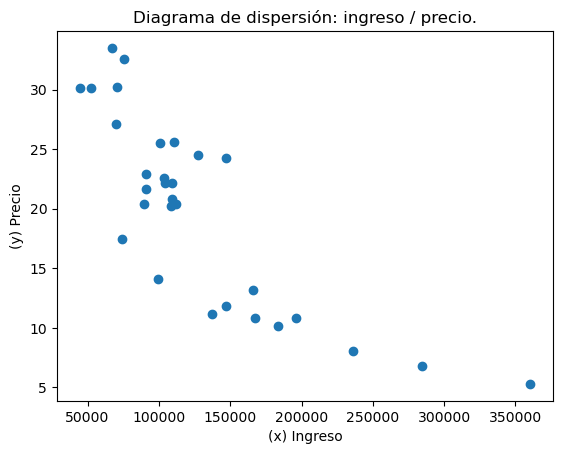

In [84]:
nombre_x = 'Ingreso'

variable_dependiente = input('Escoja la variable dependiente: 1 = Consumo; 2 = Precio: ')
modelo = input ('Escoja un modelo: 1 = Linear; 2 = Logarítmico; 3 = Exponencial; 4 = Potencial: ')

lr = LinearRegression()

if variable_dependiente == '1':

    nombre_y = 'Consumo'

    if modelo == '1':
        #ingreso_consumo_lineal
        ingreso_consumo_lineal = lr.fit(X, y_consumo)
        R2_consumo_lineal = lr.score(X, y_consumo)
        print('REGRESIÓN LINEAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        
        print('R^2 = {:.2f}'.format(R2_consumo_lineal))
        a_lin = lr.intercept_
        b_lin = lr.coef_
        print('\nA = {:.2f}'.format(a_lin[0]))
        print('Si {} es constante, {} es igual a {:.2f} {}.'.format(nombre_x.lower(),
                                                                    nombre_y.lower(),
                                                                    a_lin[0] * unidad,
                                                                    nombre_unidad))
        print('\nB = {:.5f}'.format(b_lin[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_lin[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}X'.format(a_lin[0],b_lin[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '2':
        #ingreso_consumo_logaritmico
        ingreso_consumo_lineal = lr.fit(X_log, y_consumo)
        R2_consumo_log = lr.score(X_log, y_consumo)
        print('REGRESIÓN LOGARÍTMICA: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_log))
        a_log = lr.intercept_
        b_log = lr.coef_
        print('\nA = {:.2f}'.format(a_log[0]))
        print('\nB = {:.5f}'.format(b_log[0][0]))
        print('Por un incremento del 1% en {}, el {} aumenta en {:.5f} {}.'.format(nombre_x.lower(),
                                                                                   nombre_y.lower(),
                                                                                   b_log[0][0] * unidad,
                                                                                   nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}LnX'.format(a_log[0],b_log[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '3':
        #ingreso_consumo_exponencial
        ingreso_consumo_exp = lr.fit(X_log, y_consumo_log)
        R2_consumo_exp = lr.score(X, y_consumo_log)
        print('REGRESIÓN EXPONENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_exp))
        a_exp = lr.intercept_
        b_exp = lr.coef_
        print('\nA = {:.2f}'.format(a_exp[0]))
        print('\nB = {:.5f}'.format(b_exp[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_exp[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^{:.7f}X]'.format(a_exp[0],b_exp[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '4':
        #ingreso_consumo_potencial
        ingreso_consumo_pot = lr.fit(X_log, y_consumo_log)
        R2_consumo_pot = lr.score(X_log, y_consumo_log)
        print('\nREGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_pot))
        a_pot = lr.intercept_
        b_pot = lr.coef_
        print('A = {:.2f}'.format(a_pot[0]))
        print('B = {:.5f}'.format(b_pot[0][0]))
        print('Por un incremento del 1% en {}, el {} aumenta en {:.2f}%.\n'.format(nombre_x.lower(),
                                                                                     nombre_y.lower(),
                                                                                     b_pot[0][0] * 100))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados
                                                                                     

elif variable_dependiente == '2':

    nombre_y = 'Precio'

    if modelo == '1':
        #ingreso_consumo_lineal
        ingreso_consumo_lineal = lr.fit(X, y_precio)
        R2_consumo_lineal = lr.score(X, y_precio)
        print('REGRESIÓN LINEAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('R^2 = {:.2f}'.format(R2_consumo_lineal))
        a_lin = lr.intercept_
        b_lin = lr.coef_
        print('\nA = {:.2f}'.format(a_lin[0]))
        print('Si {} es constante, {} es igual a {:.2f} {}.'.format(nombre_x.lower(),
                                                                    nombre_y.lower(),
                                                                    a_lin[0] * unidad,
                                                                    nombre_unidad))
        print('\nB = {:.5f}'.format(b_lin[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_lin[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}X'.format(a_lin[0],b_lin[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados
    
    if modelo == '2':
        #ingreso_consumo_logaritmico
        ingreso_consumo_lineal = lr.fit(X_log, y_precio)
        R2_consumo_log = lr.score(X_log, y_precio)
        print('REGRESIÓN LOGARÍTMICA: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_log))
        a_log = lr.intercept_
        b_log = lr.coef_
        print('\nA = {:.2f}'.format(a_log[0]))
        print('\nB = {:.5f}'.format(b_log[0][0]))
        print('Por un incremento del 1% en {}, el {} aumenta en {:.5f} {}.'.format(nombre_x.lower(),
                                                                                   nombre_y.lower(),
                                                                                   b_log[0][0] * unidad,
                                                                                   nombre_unidad))
        print('\nECUACIÓN: Y = {:.2f} + {:.5f}LnX'.format(a_log[0],b_log[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '3':
        #ingreso_consumo_exponencial
        ingreso_consumo_exp = lr.fit(X, y_precio_log)
        R2_consumo_exp = lr.score(X, y_precio_log)
        print('REGRESIÓN EXPONENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                       nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_exp))
        a_exp = lr.intercept_
        b_exp = lr.coef_
        print('\nA = {:.2f}'.format(a_exp[0]))
        print('\nB = {:.5f}'.format(b_exp[0][0]))
        print('Por un incremento de {:.2f} {} en {}, el {} aumenta en {:.5f} {}.'.format(unidad,
                                                                                         nombre_unidad,
                                                                                         nombre_x.lower(),
                                                                                         nombre_y.lower(),
                                                                                         b_exp[0][0] * unidad,
                                                                                         nombre_unidad))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * e^{:.7f}X]'.format(a_exp[0],b_exp[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

    if modelo == '4':
        #ingreso_consumo_potencial
        ingreso_consumo_pot = lr.fit(X_log, y_precio_log)
        R2_consumo_pot = lr.score(X_log, y_precio_log)
        print('\nREGRESIÓN POTENCIAL: {} / {}.'.format(nombre_x.lower(),
                                                  nombre_y.lower()))
        print('\nR^2 = {:.2f}'.format(R2_consumo_pot))
        a_pot = lr.intercept_
        b_pot = lr.coef_
        print('A = {:.2f}'.format(a_pot[0]))
        print('B = {:.5f}'.format(b_pot[0][0]))
        print('Por un incremento del 1% en {}, el {} aumenta en {:.2f}%.\n'.format(nombre_x.lower(),
                                                                                     nombre_y.lower(),
                                                                                     b_pot[0][0] * 100))
        print('\nECUACIÓN: Y = Ln[e^{:.2f} * X^({:.7f}LnX)]'.format(a_pot[0],b_pot[0][0]))
        print('\nY-ESTIMADA:')
        y_pred = lr.predict(X)
        print(y_pred[0:5]) #primeros 5 valores estimados

###---DIAGRAMA DE DISPERSIÓN---###
plt.title('Diagrama de dispersión: {} / {}.'.format(nombre_x.lower(),
                                                    nombre_y.lower()))
plt.xlabel('(x) {}'.format(nombre_x))
plt.ylabel('(y) {}'.format(nombre_y))
plt.scatter(X, y_precio) #gráfico de dispersión
plt.show() #for clean output

In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

In [ ]:
print(db.corr())

## Paso 2: Gráfico de dispersión.

In [ ]:
###---DIAGRAMA DE DISPERSIÓN---###
plt.title('Diagrama de dispersión: {} / {}.'.format(eje_x.lower(), eje_y.lower()))
plt.xlabel('(x) {}'.format(eje_x))
plt.ylabel('(y) {}'.format(eje_y))
plt.scatter(x, y) #gráfico de dispersión
plt.show() #for clean output

## Paso 3: Elección, estimación e interpretación del modelo. Estadística descriptiva multivariada (r, R^2).

In [ ]:
###---ELECCIÓN DEL MODELO---###

modelo = input('Escoja el modelo: 1 = Lineal; 2 = Logarítmico; 3 = Exponencial; 4 = Potencial: ')

if modelo == '1':
    SCx = sum(x ** 2) - ((sum(x) ** 2) / len(x))
    SCy = sum(y ** 2) - ((sum(y) ** 2) / len(y))
    SCxy = sum(x * y) - (sum(x) * sum(y)) / len(x)
    pendiente = SCxy / SCx
    print('REGRESIÓN LINEAL:\n')
    ###---RECTA DE MEJOR AJUSTE---###
    print('La pendiente de la recta de regresión es: {:.5f}.\nPor un incremento de {:.2f} {} en {}, el {} aumenta en {:.2f} {}.'.format(pendiente,
                                                                                                                                        unidad,
                                                                                                                                        nombre_unidad,
                                                                                                                                        eje_x.lower(),
                                                                                                                                        eje_y.lower(),
                                                                                                                                        pendiente * unidad,
                                                                                                                                        nombre_unidad))
    interseccion = mean_y - (pendiente * mean_x)
    print('\nLa interseccion de la recta con el eje y ocurre en el punto: (0, {:.2f})\nSi {} es constante, {} es igual a {:.2f} {}.'.format(interseccion,
                                                                                                                                    eje_x.lower(),
                                                                                                                                    eje_y.lower(),
                                                                                                                                    interseccion * unidad,
                                                                                                                                    nombre_unidad))
    print('\nLa ecuación de la recta es Y = {:.2f} + {:.5f} X\nX = Y - {:.2f} / {:.5f}\n'.format(interseccion,
                                                                                                 pendiente,
                                                                                                 interseccion,
                                                                                                 pendiente))
    #si es lineal, 'x' y 'y' van normal
    reg_x = db['INGRESO']
    X2 = sm.add_constant(reg_x)
    if variable_dependiente == '1':
        y = db['CONSUMO']
    elif variable_dependiente == '2':
        y = db['PRECIO']
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

elif modelo == '2':
    SCx = sum(x_log ** 2) - ((sum(x_log) ** 2) / len(x))
    SCy = sum(y ** 2) - ((sum(y) ** 2) / len(y))
    SCxy = sum(x_log*y) - (sum(x_log) * sum(y)) / len(x)
    pendiente = SCxy / SCx
    print('REGRESIÓN LOGARÍTMICA:\n')
    ###---CURVA DE MEJOR AJUSTE---###
    print('La pendiente de la curva de regresión es: {:.5f}.\nPor un incremento del 1% en {}, el {} aumenta en {:.2f} {}.\n'.format(pendiente,
                                                                                                                                        eje_x.lower(),
                                                                                                                                        eje_y.lower(),
                                                                                                                                        pendiente * unidad,
                                                                                                                                        nombre_unidad))
    interseccion = (sum(y) - (pendiente * sum(x_log))) / len(x)
    print('La interseccion de la curva con el eje Y ocurre en el punto: (0, {:.2f})'.format(interseccion))
    print('\nLa ecuación de la curva es Y = {:.2f} + {:.5f} LnX\n'.format(interseccion,
                                                                          pendiente))
    #si es logaritmica, 'x' va en ln y 'y' va normal
    reg_x = db['INGRESO_ln']
    X2 = sm.add_constant(reg_x)
    if variable_dependiente == '1':
        y = db['CONSUMO']
    elif variable_dependiente == '2':
        y = db['PRECIO']
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

elif modelo == '3':
    SCx = sum(x ** 2) - ((sum(x) ** 2) / len(x))
    SCy = sum(y_log ** 2) - ((sum(y_log) ** 2) / len(y))
    SCxy = sum(x*y_log) - (sum(x) * sum(y_log)) / len(x)
    pendiente = SCxy / SCx
    print('REGRESIÓN EXPONENCIAL:\n')
    ###---CURVA DE MEJOR AJUSTE---###
    print('La pendiente de la curva de regresión es: {:.5f}.\nPor un incremento de {:.2f} {} en {}, el {} aumenta en {:.2f}%.\n'.format(pendiente,
                                                                                                                                        unidad,
                                                                                                                                        nombre_unidad,
                                                                                                                                        eje_x.lower(),
                                                                                                                                        eje_y.lower(),
                                                                                                                                        pendiente * 100))
    interseccion = (sum(y_log) - (pendiente * sum(x))) / len(x)
    print('La interseccion de la curva con el eje Y ocurre en el punto: (0, {:.2f})'.format(interseccion))
    print('\nLa ecuación de la curva es LnY = {:.2f} + {:.5f}X\n'.format(interseccion,
                                                                         pendiente))
    #si es exponencial 'x' va normal y 'y' va en ln
    reg_x = db['INGRESO']
    X2 = sm.add_constant(reg_x)
    if variable_dependiente == '1':
        y = db['CONSUMO_ln']
    elif variable_dependiente == '2':
        y = db['PRECIO_ln']
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

elif modelo == '4':
    SCx = sum(x_log ** 2) - ((sum(x_log) ** 2) / len(x))
    SCy = sum(y_log ** 2) - ((sum(y_log) ** 2) / len(y))
    SCxy = sum(x_log*y_log) - (sum(x_log) * sum(y_log)) / len(x)
    pendiente = SCxy / SCx
    print('REGRESIÓN POTENCIAL:\n')
    ###---CURVA DE MEJOR AJUSTE---###
    print('La pendiente de la curva de regresión es: {:.5f}.\nPor un incremento del 1% en {}, el {} aumenta en {:.2f}%.\n'.format(pendiente,
                                                                                                                                    eje_x.lower(),
                                                                                                                                    eje_y.lower(),
                                                                                                                                    pendiente * 100))
    interseccion = (sum(y_log) - (pendiente * sum(x_log))) / len(x)
    print('La interseccion de la curva con el eje Y ocurre en el punto: (0, {:.2f})'.format(interseccion))
    print('\nLa ecuación de la curva es LnY = {:.2f} + {:.5f}LnX\n'.format(interseccion,
                                                                           pendiente))
    #si es potencial, 'x' y 'y' van en ln
    reg_x = db['INGRESO_ln']
    X2 = sm.add_constant(reg_x)
    if variable_dependiente == '1':
        y = db['CONSUMO_ln']
    elif variable_dependiente == '2':
        y = db['PRECIO_ln']
    est = sm.OLS(y, X2)
    est2 = est.fit()
    print(est2.summary())

####---CALCULO DE (r)---###
#r = SCxy / np.sqrt(SCx * SCy)
#print('r = {:.3f}'.format(r))
####---INTERPRETACIÓN DE (r)---###
#if r > 0:
#    if r > 0.5:
#        print('Existe una correlación positiva fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
#    else:
#        print('Existe una correlación positiva débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
#elif r < 0:
#    if r < -0.5:
#        print('Existe una correlación negativa fuerte entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
#    else:
#        print('Existe una correlación negativa débil entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
#else:
#    print('No existe ninguna correlación entre {} y {}.'.format(eje_x.lower(), eje_y.lower()))
#
####---CALCULO DE (R^2)---###
#R2 = r ** 2
#print('\nR^2 = {:.3f}'.format(R2))
####---INTERPRETACION DE (R2)---###
#print('El {:.1f}% del cambio en la cantidad de {} se explica mediante\nun cambio en la cantidad de {}.'.format((R2*100),
#                                                                                                               eje_y.lower(),
#                                                                                                               eje_x.lower()))

## Paso 4: Pronóstico.

In [ ]:
def estimar_valor_lineal():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * x_estimado) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN LINEAL:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

def estimar_valor_log():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (pendiente * math.log(x_estimado)) + interseccion
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN LOGARÍTMICA:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

def estimar_valor_exp():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = interseccion + (x_estimado * pendiente)
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN EXPONENCIAL:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

def estimar_valor_pot():

    x = []
    y = []
    
    x_estimado = None
    while x_estimado != 0:
        x_estimado = float(input('Ingrese un valor que desee estimar; (0) para salir: '))
        if x_estimado != 0:
            y_estimado = (math.e ** interseccion) * (x_estimado ** pendiente)
            x.append(x_estimado)
            y.append(y_estimado)
            print('PRONÓSTICO PARA REGRESIÓN POTENCIAL:\n')
            print('Se estima que por cada ${:.2f} COP en el {}, haya un {} de ${:.2f} COP.'.format(x_estimado,
                                                                                                   eje_x.lower(),
                                                                                                   eje_y.lower(),
                                                                                                   y_estimado * 1000))

if modelo == '1':
    estimar_valor_lineal()
elif modelo == '2':
    estimar_valor_log()
elif modelo == '3':
    estimar_valor_exp()
elif modelo == '4':
    estimar_valor_pot()

In [ ]:
###---TEST---###

#fit_lin = np.polyfit(x, y, 1) #parámetros para lineal
#print('LINEAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_lin[0], fit_lin[1]))
#
#fit_log = np.polyfit(x_log, y, 1) #parámetros para logarítmica
#print('LOGARÍTMICA: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_log[0], fit_log[1]))
#
#fit_exp = np.polyfit(x, y_log, 1) #parámetros para exponencial
#print('EXPONENCIAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.\n'.format(fit_exp[0], fit_exp[1]))
#
#fit_pot = np.polyfit(x_log, y_log, 1) #parámetros para potencial
#print('POTENCIAL: pendiente (m) = {:.3f}; intersección (a) = {:.3f}.'.format(fit_pot[0], fit_pot[1]))